In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_nifti_with_heatmap(nifti_path, heatmap_path, slice, threshold=0.5, alpha=0.7):
    # Load the NIfTI image
    nifti_img = nib.load(nifti_path)
    nifti_data = nifti_img.get_fdata()

    # Load the heatmap
    heatmap_img = nib.load(heatmap_path)
    heatmap_data = heatmap_img.get_fdata()

    # Apply threshold to the heatmap
    thresholded_heatmap = np.where(heatmap_data > threshold, heatmap_data, 0)

    if slice is None:
        slice = nifti_data.shape[2] // 2
    # Display the original NIfTI image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(np.rot90(nifti_data[:, :, slice]), cmap='gray')
    plt.title('Original NIfTI MRI')

    # Display the thresholded heatmap overlaid on the image
    plt.subplot(1, 2, 2)
    plt.imshow(np.rot90(nifti_data[:, :, slice]), cmap='gray')
    plt.imshow(np.rot90(thresholded_heatmap[:, :, slice]), cmap='hot', alpha=alpha)
    plt.title('Thresholded Heatmap')

    # Adjust subplot spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

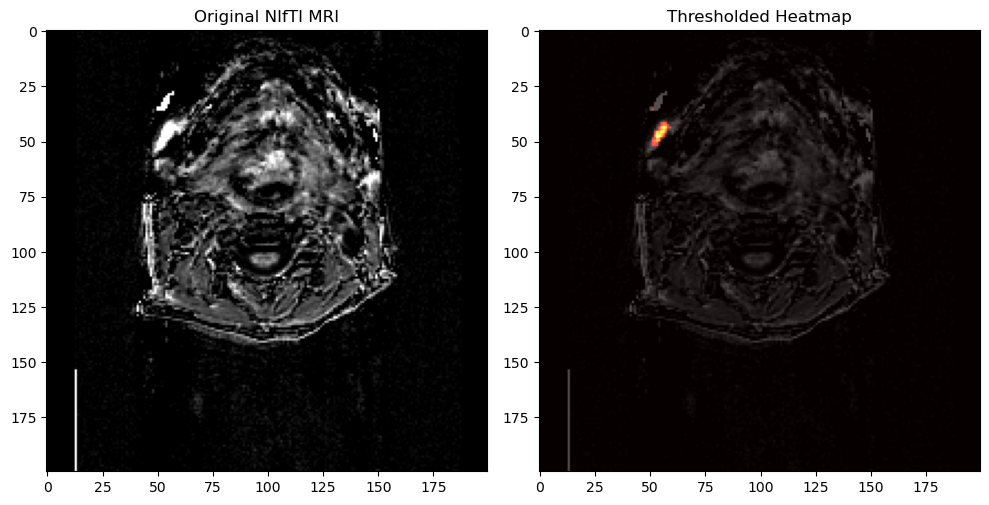

In [10]:
# Usage example
nifti_path = "/mrhome/alejandrocu/Documents/parkinson_classification/xai_outs/sub-019/occ_sens/3A_hMRI_MTsat_optim_adam_lr_0.01/sub-019_['MTsat']_occ_s5_ps8_og_img.nii.gz"
heatmap_path = "/mrhome/alejandrocu/Documents/parkinson_classification/xai_outs/sub-019/grad_based/3A_hMRI_MTsat_optim_adam_lr_0.01/sub-019_['MTsat']_IntegratedGrads_nsteps_200_result.nii.gz"
display_nifti_with_heatmap(nifti_path, heatmap_path, 18, threshold=0.0003, alpha=0.7)